In [114]:
%pylab inline
from PIL import Image
import os
from io import BytesIO
from keras.preprocessing import image
import cv2
import hashlib
import time

Populating the interactive namespace from numpy and matplotlib


In [115]:
def split_88(image_data):
    blocks = []
    #image_size = image_data.shape[0]
    image_size = min(image_data.shape[0],image_data.shape[1])
    for i in range(int(image_size / 8)):
        row = image_data[8*i:8*(i+1), :]
        for j in range(int(image_size / 8)):
            col = row[:, 8*j:8*(j+1)]
            blocks.append(col.astype(float32))
    return array(blocks)

def merge_88(blocks):
    block_count = blocks.shape[0]
    edge_len = int(sqrt(block_count))
    img_size = 8*edge_len
    image_rows = []
    for i in range(edge_len):
        img_row = hstack(blocks[edge_len*i: edge_len*(i+1), ...])
        image_rows.append(img_row)
    return vstack(image_rows)

def split_1616(image_data):
    blocks = []
    image_size = image_data.shape[0]
    for i in range(int(image_size / 16)):
        row = image_data[16*i:16*(i+1), :]
        for j in range(int(image_size / 16)):
            col = row[:, 16*j:16*(j+1)]
            blocks.append(col.astype(float32))
    return array(blocks)

def merge_1616(blocks):
    block_count = blocks.shape[0]
    edge_len = int(sqrt(block_count))
    img_size = 16*edge_len
    image_rows = []
    for i in range(edge_len):
        img_row = hstack(blocks[edge_len*i: edge_len*(i+1), ...])
        image_rows.append(img_row)
    return vstack(image_rows)

def zig_zag_flatten(a):
    return np.concatenate([np.diagonal(a[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-a.shape[0], a.shape[0])])    

In [121]:
def image_generator(images_dir, target_size=None):
    count = 0
    while True:
        print("Data round %s" % count)
        for filename in os.listdir(images_dir):
            img = Image.open("%s/%s" % (images_dir, filename))
            print("%s/%s" % (images_dir, filename))
            if target_size is not None:
                img = img.resize(target_size)
#             img = image.load_img('%s/%s' % (images_dir, filename), target_size=target_size)

            f = BytesIO()
            img.save(f, format='JPEG', quality=75)
            bytes_content = f.getvalue()
            origin_file_size = len(bytes_content)
            yield img, origin_file_size
        count += 1

0
Data round 0
/home/imagenet-data/train/n03085013/n03085013_4489.JPEG
origin_image_size : 31619
rec_pil_image_size : 12218
origin_image_size : 31619
compress_rate : 0.386413232550049
1
/home/imagenet-data/train/n03085013/n03085013_25671.JPEG
origin_image_size : 34973
rec_pil_image_size : 16016
origin_image_size : 34973
compress_rate : 0.4579532782432162
2
/home/imagenet-data/train/n03085013/n03085013_20716.JPEG
origin_image_size : 18355
rec_pil_image_size : 6901
origin_image_size : 18355
compress_rate : 0.37597384908744214
3
/home/imagenet-data/train/n03085013/n03085013_9533.JPEG
origin_image_size : 17318
rec_pil_image_size : 13115
origin_image_size : 17318
compress_rate : 0.7573045386303269
4
/home/imagenet-data/train/n03085013/n03085013_5738.JPEG
origin_image_size : 46121
rec_pil_image_size : 25639
origin_image_size : 46121
compress_rate : 0.5559072873528328
5
/home/imagenet-data/train/n03085013/n03085013_29042.JPEG
origin_image_size : 21532
rec_pil_image_size : 8183
origin_image_si

rec_pil_image_size : 11862
origin_image_size : 32487
compress_rate : 0.36513066765167607
48
/home/imagenet-data/train/n03085013/n03085013_22293.JPEG
origin_image_size : 33580
rec_pil_image_size : 16828
origin_image_size : 33580
compress_rate : 0.501131625967838
49
/home/imagenet-data/train/n03085013/n03085013_15785.JPEG
origin_image_size : 35614
rec_pil_image_size : 20304
origin_image_size : 35614
compress_rate : 0.5701128769584994
50
/home/imagenet-data/train/n03085013/n03085013_24077.JPEG
origin_image_size : 25708
rec_pil_image_size : 10868
origin_image_size : 25708
compress_rate : 0.422747782791349
51
/home/imagenet-data/train/n03085013/n03085013_5751.JPEG
origin_image_size : 18673
rec_pil_image_size : 7886
origin_image_size : 18673
compress_rate : 0.42232099823274244
52
/home/imagenet-data/train/n03085013/n03085013_24530.JPEG
origin_image_size : 13334
rec_pil_image_size : 6738
origin_image_size : 13334
compress_rate : 0.5053247337633119
53
/home/imagenet-data/train/n03085013/n03085

rec_pil_image_size : 10787
origin_image_size : 23898
compress_rate : 0.4513766842413591
96
/home/imagenet-data/train/n03085013/n03085013_21947.JPEG
origin_image_size : 25482
rec_pil_image_size : 11951
origin_image_size : 25482
compress_rate : 0.4689977238835256
97
/home/imagenet-data/train/n03085013/n03085013_25047.JPEG
origin_image_size : 26507
rec_pil_image_size : 13644
origin_image_size : 26507
compress_rate : 0.5147319575961067
98
/home/imagenet-data/train/n03085013/n03085013_7440.JPEG
origin_image_size : 51852
rec_pil_image_size : 17679
origin_image_size : 51852
compress_rate : 0.34095116871094655
99
/home/imagenet-data/train/n03085013/n03085013_19285.JPEG
origin_image_size : 24995
rec_pil_image_size : 15150
origin_image_size : 24995
compress_rate : 0.6061212242448489
100
/home/imagenet-data/train/n03085013/n03085013_22386.JPEG
origin_image_size : 34281
rec_pil_image_size : 16532
origin_image_size : 34281
compress_rate : 0.48224964265919895
101
/home/imagenet-data/train/n03085013/

rec_pil_image_size : 9780
origin_image_size : 18191
compress_rate : 0.5376284976087076
143
/home/imagenet-data/train/n03085013/n03085013_24648.JPEG
origin_image_size : 17753
rec_pil_image_size : 8591
origin_image_size : 17753
compress_rate : 0.48391821100659044
144
/home/imagenet-data/train/n03085013/n03085013_18945.JPEG
origin_image_size : 12946
rec_pil_image_size : 4985
origin_image_size : 12946
compress_rate : 0.38506102270971726
145
/home/imagenet-data/train/n03085013/n03085013_22187.JPEG
origin_image_size : 29608
rec_pil_image_size : 14056
origin_image_size : 29608
compress_rate : 0.4747365576871116
146
/home/imagenet-data/train/n03085013/n03085013_15249.JPEG
origin_image_size : 58903
rec_pil_image_size : 39085
origin_image_size : 58903
compress_rate : 0.6635485459144695
147
/home/imagenet-data/train/n03085013/n03085013_2277.JPEG
origin_image_size : 63386
rec_pil_image_size : 34682
origin_image_size : 63386
compress_rate : 0.5471555233016755
148
/home/imagenet-data/train/n03085013

rec_pil_image_size : 9594
origin_image_size : 18634
compress_rate : 0.5148652999892669
190
/home/imagenet-data/train/n03085013/n03085013_21050.JPEG
origin_image_size : 24602
rec_pil_image_size : 7273
origin_image_size : 24602
compress_rate : 0.2956263718396878
191
/home/imagenet-data/train/n03085013/n03085013_24087.JPEG
origin_image_size : 10055
rec_pil_image_size : 4325
origin_image_size : 10055
compress_rate : 0.4301342615614122
192
/home/imagenet-data/train/n03085013/n03085013_12140.JPEG
origin_image_size : 29273
rec_pil_image_size : 8683
origin_image_size : 29273
compress_rate : 0.29662146004850887
193
/home/imagenet-data/train/n03085013/n03085013_21238.JPEG
origin_image_size : 3653
rec_pil_image_size : 1774
origin_image_size : 3653
compress_rate : 0.4856282507528059
194
/home/imagenet-data/train/n03085013/n03085013_22494.JPEG
origin_image_size : 23587
rec_pil_image_size : 11820
origin_image_size : 23587
compress_rate : 0.5011235002331793
195
/home/imagenet-data/train/n03085013/n03

rec_pil_image_size : 12682
origin_image_size : 39471
compress_rate : 0.3212991816776874
237
/home/imagenet-data/train/n03085013/n03085013_805.JPEG
origin_image_size : 57632
rec_pil_image_size : 26374
origin_image_size : 57632
compress_rate : 0.4576277068295391
238
/home/imagenet-data/train/n03085013/n03085013_22175.JPEG
origin_image_size : 27982
rec_pil_image_size : 12902
origin_image_size : 27982
compress_rate : 0.4610821242227146
239
/home/imagenet-data/train/n03085013/n03085013_5430.JPEG
origin_image_size : 21617
rec_pil_image_size : 10212
origin_image_size : 21617
compress_rate : 0.4724059767775362
240
/home/imagenet-data/train/n03085013/n03085013_19179.JPEG
origin_image_size : 16526
rec_pil_image_size : 7738
origin_image_size : 16526
compress_rate : 0.46823187704223646
241
/home/imagenet-data/train/n03085013/n03085013_34973.JPEG
origin_image_size : 37600
rec_pil_image_size : 15384
origin_image_size : 37600
compress_rate : 0.40914893617021275
242
/home/imagenet-data/train/n03085013

rec_pil_image_size : 14610
origin_image_size : 30266
compress_rate : 0.4827198836978788
284
/home/imagenet-data/train/n03085013/n03085013_26449.JPEG
origin_image_size : 22069
rec_pil_image_size : 8694
origin_image_size : 22069
compress_rate : 0.3939462594589696
285
/home/imagenet-data/train/n03085013/n03085013_22002.JPEG
origin_image_size : 22822
rec_pil_image_size : 9632
origin_image_size : 22822
compress_rate : 0.42204890018403296
286
/home/imagenet-data/train/n03085013/n03085013_19630.JPEG
origin_image_size : 18268
rec_pil_image_size : 8535
origin_image_size : 18268
compress_rate : 0.4672104225968907
287
/home/imagenet-data/train/n03085013/n03085013_6978.JPEG
origin_image_size : 24043
rec_pil_image_size : 12321
origin_image_size : 24043
compress_rate : 0.5124568481470698
288
/home/imagenet-data/train/n03085013/n03085013_9123.JPEG
origin_image_size : 27581
rec_pil_image_size : 9712
origin_image_size : 27581
compress_rate : 0.3521264638700555
289
/home/imagenet-data/train/n03085013/n0

rec_pil_image_size : 12074
origin_image_size : 21036
compress_rate : 0.5739684350637003
331
/home/imagenet-data/train/n03085013/n03085013_24653.JPEG
origin_image_size : 24324
rec_pil_image_size : 9864
origin_image_size : 24324
compress_rate : 0.4055254070054267
332
/home/imagenet-data/train/n03085013/n03085013_19185.JPEG
origin_image_size : 18952
rec_pil_image_size : 10837
origin_image_size : 18952
compress_rate : 0.5718130012663571
333
/home/imagenet-data/train/n03085013/n03085013_8478.JPEG
origin_image_size : 14034
rec_pil_image_size : 7336
origin_image_size : 14034
compress_rate : 0.5227305116146501
334
/home/imagenet-data/train/n03085013/n03085013_18685.JPEG
origin_image_size : 45321
rec_pil_image_size : 20928
origin_image_size : 45321
compress_rate : 0.46177268815780764
335
/home/imagenet-data/train/n03085013/n03085013_4814.JPEG
origin_image_size : 29244
rec_pil_image_size : 14764
origin_image_size : 29244
compress_rate : 0.5048556968950896
336
/home/imagenet-data/train/n03085013/

rec_pil_image_size : 7731
origin_image_size : 17745
compress_rate : 0.4356720202874049
378
/home/imagenet-data/train/n03085013/n03085013_20597.JPEG
origin_image_size : 39500
rec_pil_image_size : 25023
origin_image_size : 39500
compress_rate : 0.633493670886076
379
/home/imagenet-data/train/n03085013/n03085013_11685.JPEG
origin_image_size : 67937
rec_pil_image_size : 16316
origin_image_size : 67937
compress_rate : 0.24016368105745028
380
/home/imagenet-data/train/n03085013/n03085013_2272.JPEG
origin_image_size : 38396
rec_pil_image_size : 18176
origin_image_size : 38396
compress_rate : 0.4733826440254193
381
/home/imagenet-data/train/n03085013/n03085013_24257.JPEG
origin_image_size : 29872
rec_pil_image_size : 11250
origin_image_size : 29872
compress_rate : 0.37660685591858595
382
/home/imagenet-data/train/n03085013/n03085013_18858.JPEG
origin_image_size : 16345
rec_pil_image_size : 7276
origin_image_size : 16345
compress_rate : 0.44515142245334965
383
/home/imagenet-data/train/n0308501

rec_pil_image_size : 25104
origin_image_size : 39236
compress_rate : 0.6398205729432154
425
/home/imagenet-data/train/n03085013/n03085013_19008.JPEG
origin_image_size : 26698
rec_pil_image_size : 8643
origin_image_size : 26698
compress_rate : 0.32373211476515096
426
/home/imagenet-data/train/n03085013/n03085013_23014.JPEG
origin_image_size : 29306
rec_pil_image_size : 12582
origin_image_size : 29306
compress_rate : 0.42933187743124274
427
/home/imagenet-data/train/n03085013/n03085013_630.JPEG
origin_image_size : 15395
rec_pil_image_size : 7552
origin_image_size : 15395
compress_rate : 0.49054887950633325
428
/home/imagenet-data/train/n03085013/n03085013_15836.JPEG
origin_image_size : 15704
rec_pil_image_size : 6124
origin_image_size : 15704
compress_rate : 0.3899643402954661
429
/home/imagenet-data/train/n03085013/n03085013_22790.JPEG
origin_image_size : 34173
rec_pil_image_size : 15177
origin_image_size : 34173
compress_rate : 0.4441225528926345
430
/home/imagenet-data/train/n03085013

rec_pil_image_size : 10779
origin_image_size : 23634
compress_rate : 0.4560802234069561
473
/home/imagenet-data/train/n03085013/n03085013_23166.JPEG
origin_image_size : 19483
rec_pil_image_size : 10373
origin_image_size : 19483
compress_rate : 0.5324128727608685
474
/home/imagenet-data/train/n03085013/n03085013_2945.JPEG
origin_image_size : 12368
rec_pil_image_size : 4797
origin_image_size : 12368
compress_rate : 0.3878557567917206
475
/home/imagenet-data/train/n03085013/n03085013_6561.JPEG
origin_image_size : 30622
rec_pil_image_size : 12035
origin_image_size : 30622
compress_rate : 0.3930180915681536
476
/home/imagenet-data/train/n03085013/n03085013_18902.JPEG
origin_image_size : 30012
rec_pil_image_size : 17541
origin_image_size : 30012
compress_rate : 0.5844662135145942
477
/home/imagenet-data/train/n03085013/n03085013_2064.JPEG
origin_image_size : 33296
rec_pil_image_size : 18215
origin_image_size : 33296
compress_rate : 0.5470627102354637
478
/home/imagenet-data/train/n03085013/n

rec_pil_image_size : 20294
origin_image_size : 34635
compress_rate : 0.5859390789663635
520
/home/imagenet-data/train/n03085013/n03085013_21289.JPEG
origin_image_size : 14374
rec_pil_image_size : 5074
origin_image_size : 14374
compress_rate : 0.35299846945874497
521
/home/imagenet-data/train/n03085013/n03085013_20999.JPEG
origin_image_size : 17243
rec_pil_image_size : 8213
origin_image_size : 17243
compress_rate : 0.4763092269326683
522
/home/imagenet-data/train/n03085013/n03085013_15365.JPEG
origin_image_size : 23539
rec_pil_image_size : 10841
origin_image_size : 23539
compress_rate : 0.460554823909257
523
/home/imagenet-data/train/n03085013/n03085013_19586.JPEG
origin_image_size : 36633
rec_pil_image_size : 15232
origin_image_size : 36633
compress_rate : 0.41579996178309175
524
/home/imagenet-data/train/n03085013/n03085013_21939.JPEG
origin_image_size : 27104
rec_pil_image_size : 13059
origin_image_size : 27104
compress_rate : 0.4818108028335301
525
/home/imagenet-data/train/n0308501

rec_pil_image_size : 19625
origin_image_size : 34065
compress_rate : 0.576104506091296
569
/home/imagenet-data/train/n03085013/n03085013_679.JPEG
origin_image_size : 22385
rec_pil_image_size : 11372
origin_image_size : 22385
compress_rate : 0.5080187625642171
570
/home/imagenet-data/train/n03085013/n03085013_5501.JPEG
origin_image_size : 7007
rec_pil_image_size : 5044
origin_image_size : 7007
compress_rate : 0.7198515769944341
571
/home/imagenet-data/train/n03085013/n03085013_21115.JPEG
origin_image_size : 34379
rec_pil_image_size : 13745
origin_image_size : 34379
compress_rate : 0.3998080223392187
572
/home/imagenet-data/train/n03085013/n03085013_15432.JPEG
origin_image_size : 17525
rec_pil_image_size : 5615
origin_image_size : 17525
compress_rate : 0.3203994293865906
573
/home/imagenet-data/train/n03085013/n03085013_5819.JPEG
origin_image_size : 35202
rec_pil_image_size : 15256
origin_image_size : 35202
compress_rate : 0.43338446679165954
574
/home/imagenet-data/train/n03085013/n0308

rec_pil_image_size : 16323
origin_image_size : 31966
compress_rate : 0.5106363010698868
616
/home/imagenet-data/train/n03085013/n03085013_22728.JPEG
origin_image_size : 18390
rec_pil_image_size : 8717
origin_image_size : 18390
compress_rate : 0.4740076128330614
617
/home/imagenet-data/train/n03085013/n03085013_18673.JPEG
origin_image_size : 16218
rec_pil_image_size : 6485
origin_image_size : 16218
compress_rate : 0.39986434825502526
618
/home/imagenet-data/train/n03085013/n03085013_20990.JPEG
origin_image_size : 30657
rec_pil_image_size : 12005
origin_image_size : 30657
compress_rate : 0.3915908275434648
619
/home/imagenet-data/train/n03085013/n03085013_21272.JPEG
origin_image_size : 25819
rec_pil_image_size : 9347
origin_image_size : 25819
compress_rate : 0.3620202176691584
620
/home/imagenet-data/train/n03085013/n03085013_23693.JPEG
origin_image_size : 25348
rec_pil_image_size : 10256
origin_image_size : 25348
compress_rate : 0.4046078586081742
621
/home/imagenet-data/train/n03085013

rec_pil_image_size : 15675
origin_image_size : 26265
compress_rate : 0.5968018275271274
663
/home/imagenet-data/train/n03085013/n03085013_22027.JPEG
origin_image_size : 25985
rec_pil_image_size : 12502
origin_image_size : 25985
compress_rate : 0.481123725226092
664
/home/imagenet-data/train/n03085013/n03085013_19345.JPEG
origin_image_size : 32861
rec_pil_image_size : 18305
origin_image_size : 32861
compress_rate : 0.5570433036121847
665
/home/imagenet-data/train/n03085013/n03085013_21649.JPEG
origin_image_size : 27651
rec_pil_image_size : 19038
origin_image_size : 27651
compress_rate : 0.6885103612889226
666
/home/imagenet-data/train/n03085013/n03085013_4542.JPEG
origin_image_size : 17757
rec_pil_image_size : 8215
origin_image_size : 17757
compress_rate : 0.4626344540181337
667
/home/imagenet-data/train/n03085013/n03085013_6303.JPEG
origin_image_size : 36781
rec_pil_image_size : 26214
origin_image_size : 36781
compress_rate : 0.7127049291753894
668
/home/imagenet-data/train/n03085013/n

rec_pil_image_size : 54783
origin_image_size : 75526
compress_rate : 0.7253528586182242
710
/home/imagenet-data/train/n03085013/n03085013_4636.JPEG
origin_image_size : 27998
rec_pil_image_size : 9082
origin_image_size : 27998
compress_rate : 0.3243803128794914
711
/home/imagenet-data/train/n03085013/n03085013_23929.JPEG
origin_image_size : 29944
rec_pil_image_size : 12025
origin_image_size : 29944
compress_rate : 0.40158295484905154
712
/home/imagenet-data/train/n03085013/n03085013_20113.JPEG
origin_image_size : 30633
rec_pil_image_size : 17256
origin_image_size : 30633
compress_rate : 0.5633140730584664
713
/home/imagenet-data/train/n03085013/n03085013_20533.JPEG
origin_image_size : 29156
rec_pil_image_size : 23841
origin_image_size : 29156
compress_rate : 0.8177047605981617
714
/home/imagenet-data/train/n03085013/n03085013_22368.JPEG
origin_image_size : 16102
rec_pil_image_size : 7478
origin_image_size : 16102
compress_rate : 0.46441435846478696
715
/home/imagenet-data/train/n0308501

rec_pil_image_size : 15283
origin_image_size : 24172
compress_rate : 0.6322604666556346
757
/home/imagenet-data/train/n03085013/n03085013_24614.JPEG
origin_image_size : 21002
rec_pil_image_size : 13491
origin_image_size : 21002
compress_rate : 0.6423673935815637
758
/home/imagenet-data/train/n03085013/n03085013_20222.JPEG
origin_image_size : 18214
rec_pil_image_size : 6744
origin_image_size : 18214
compress_rate : 0.37026463160206435
759
/home/imagenet-data/train/n03085013/n03085013_23451.JPEG
origin_image_size : 14551
rec_pil_image_size : 7691
origin_image_size : 14551
compress_rate : 0.5285547385059446
760
/home/imagenet-data/train/n03085013/n03085013_21607.JPEG
origin_image_size : 21393
rec_pil_image_size : 9742
origin_image_size : 21393
compress_rate : 0.45538260178563084
761
/home/imagenet-data/train/n03085013/n03085013_21055.JPEG
origin_image_size : 42301
rec_pil_image_size : 23381
origin_image_size : 42301
compress_rate : 0.5527292498995295
762
/home/imagenet-data/train/n0308501

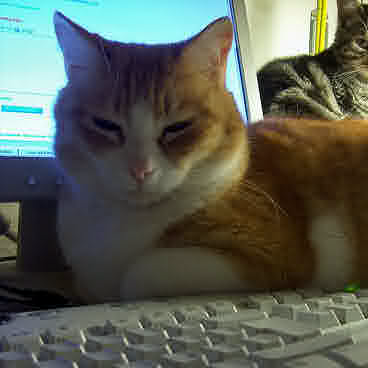

In [122]:
generator = image_generator('/home/imagenet-data/train/n03085013')
start = time.clock()
compress_rates = []
for i in range(800):
    print(i)
    origin_image, origin_image_size= next(generator)
    print("origin_image_size :",origin_image_size)

    # DeepN-JPEG
    img_yuv = origin_image.convert('YCbCr')
    channels = img_yuv.split()

    rec_channels = []
    q_tables = []
    for channel in channels:
        # split and shift
        blocks = split_88(asarray(channel)) - 128
        # dct and get std_matrix
        dct_blocks = array([cv2.dct(item) for item in blocks])
        std_matrix = zeros([8, 8])
        for i in range(8):
            for j in range(8):
                std_matrix[i, j] = std(dct_blocks[:,i,j], ddof=1)

        # Build Q-table
        q_table = zeros([8, 8], dtype=int64)
        a = 255
        b = 80
        c = 240
        T1 = 20
        T2 = 60
        k1 = 9.75
        k2 = 1
        k3 = 3
        Qmin = 5
        for i in range(8):
            for j in range(8):
                std_value = std_matrix[i, j]
                if std_value <= T1:
                    q = a - k1 * std_value
                elif std_value > T2:
                    q = c - k3 * std_value
                else:
                    q = b - k2 * std_value
                q = (q if (q > Qmin) else Qmin)
                q_table[i, j] = q
        
        q_tables.append(q_table)

        # quantization by q-table and recovery from q-table
        quantizd_dct_blocks = np.round(array([block / q_table for block in dct_blocks]))
        rec_dct_blocks = array([block * q_table for block in quantizd_dct_blocks])
        # idct, round and shift
        idct_rec_blocks = np.round(array([cv2.idct(block) for block in rec_dct_blocks])) + 128
        # merge into an image
        rec_channel = merge_88(idct_rec_blocks)
        
        rec_channels.append(clip(rec_channel, 0, 255))

    rec_channels = array(rec_channels, dtype=uint8)

    pil_channels = [Image.fromarray(channel) for channel in rec_channels]

    # image and compress image
    rec_image = Image.merge("YCbCr", channels).convert('RGB')
    rec_pil_image = Image.merge("YCbCr", pil_channels).convert('RGB')

    # compute file size
    rec_pil_image
    f2 = BytesIO()
    rec_pil_image.save(f2, format='JPEG', quality=75)#qtables=pil_qtables)
    rec_pil_image_size = len(f2.getvalue())

    # compute compress_rate
    print("rec_pil_image_size :",rec_pil_image_size)
    print("origin_image_size :",origin_image_size)

    compress_rate = (rec_pil_image_size/origin_image_size)
    print("compress_rate :",compress_rate)
    compress_rates.append(compress_rate)
end = time.clock()
print("runing time",end-start)
rec_pil_image

In [123]:
print(len(compress_rates),mean(compress_rates))

800 0.47504075686427105


In [131]:
file_size(origin_image,100)

164243

In [129]:
def file_size(image, quality):
    f = BytesIO()
    image.save(f, format='JPEG', quality = quality)
    file_size = len(f.getvalue())
    return file_size
img = Image.open("/home/imagenet-data/train/n03085013/n03085013_21004.JPEG")
file_size(img,100)

164243

In [79]:
for i in range(3):
    print(i)
    origin_image, origin_image_size= next(generator)
    print("origin_image_size ：",origin_image_size)

0
/home/imagenet-data/train/n03085013/n03085013_24633.JPEG
origin_image_size :  98639
1
/home/imagenet-data/train/n03085013/n03085013_24103.JPEG
origin_image_size :  139334
2
/home/imagenet-data/train/n03085013/n03085013_2625.JPEG
origin_image_size :  137766


153983
627812
0.24526928443546794


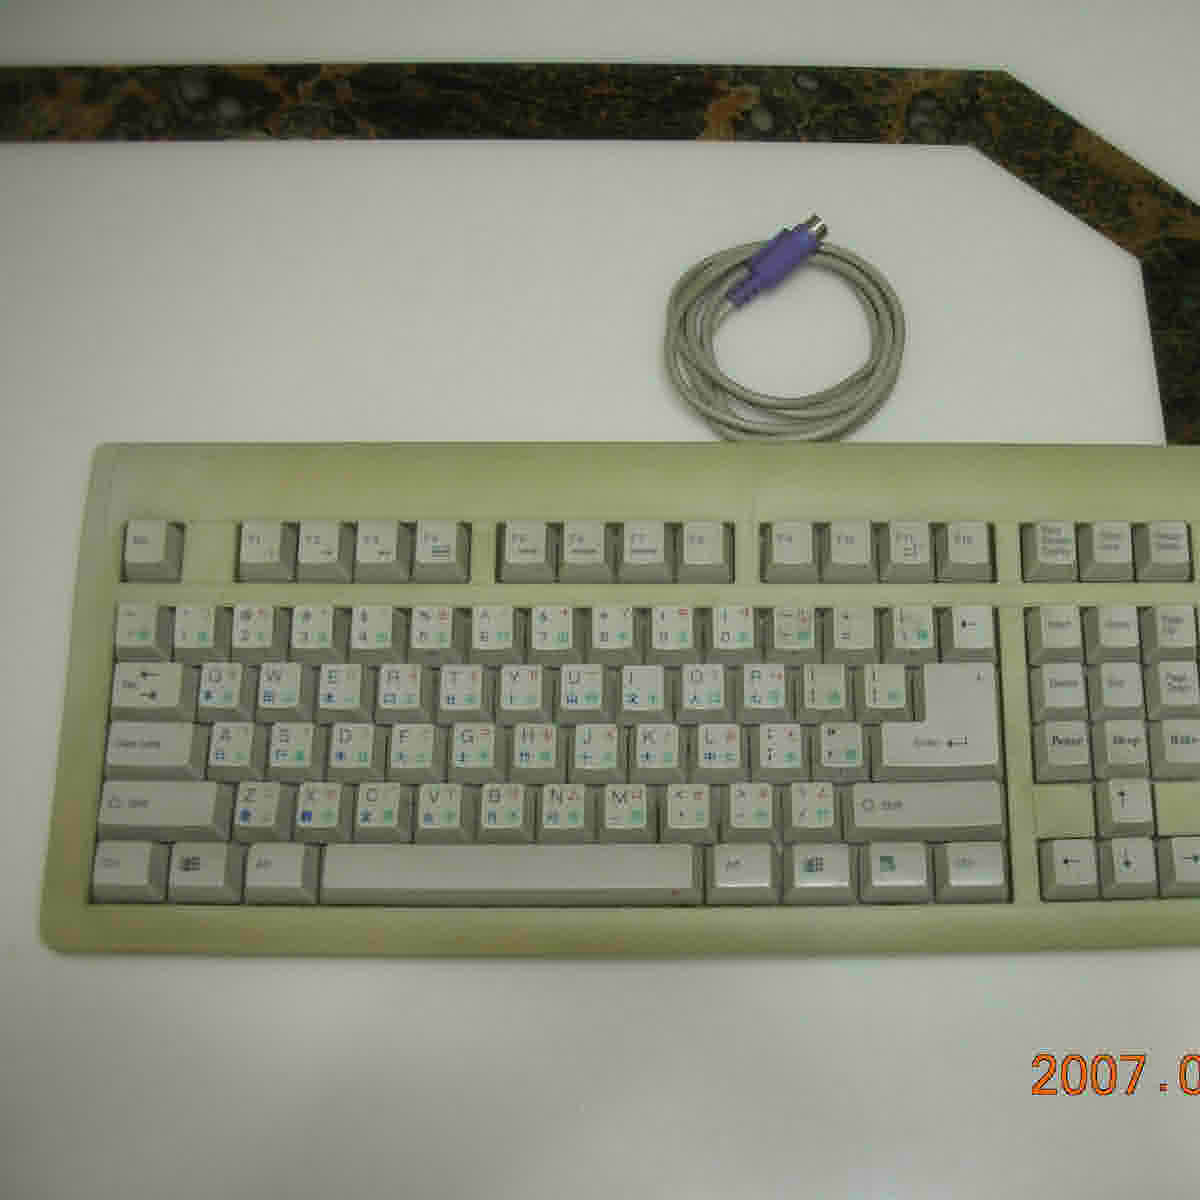

In [76]:
# DeepN-JPEG
img_yuv = origin_image.convert('YCbCr')
channels = img_yuv.split()

rec_channels = []
q_tables = []
for channel in channels:
    # split and shift
    blocks = split_88(asarray(channel)) - 128
    # dct and get std_matrix
    dct_blocks = array([cv2.dct(item) for item in blocks])
    std_matrix = zeros([8, 8])
    for i in range(8):
        for j in range(8):
            std_matrix[i, j] = std(dct_blocks[:,i,j], ddof=1)

    # Build Q-table
    q_table = zeros([8, 8], dtype=int64)
    a = 255
    b = 80
    c = 240
    T1 = 20
    T2 = 60
    k1 = 9.75
    k2 = 1
    k3 = 3
    Qmin = 5
    for i in range(8):
        for j in range(8):
            std_value = std_matrix[i, j]
            if std_value <= T1:
                q = a - k1 * std_value
            elif std_value > T2:
                q = c - k3 * std_value
            else:
                q = b - k2 * std_value
            q = (q if (q > Qmin) else Qmin)
            q_table[i, j] = q
    
    q_tables.append(q_table)

    # quantization by q-table and recovery from q-table
    quantizd_dct_blocks = np.round(array([block / q_table for block in dct_blocks]))
    rec_dct_blocks = array([block * q_table for block in quantizd_dct_blocks])
    # idct, round and shift
    idct_rec_blocks = np.round(array([cv2.idct(block) for block in rec_dct_blocks])) + 128
    # merge into an image
    rec_channel = merge_88(idct_rec_blocks)
    
    rec_channels.append(clip(rec_channel, 0, 255))

rec_channels = array(rec_channels, dtype=uint8)

pil_channels = [Image.fromarray(channel) for channel in rec_channels]

# image and compress image
rec_image = Image.merge("YCbCr", channels).convert('RGB')
rec_pil_image = Image.merge("YCbCr", pil_channels).convert('RGB')

# compute file size
rec_pil_image
f2 = BytesIO()
rec_pil_image.save(f2, format='JPEG', quality=100)#qtables=pil_qtables)
rec_pil_image_size = len(f2.getvalue())

# compute compress_rate
print(rec_pil_image_size)
print(origin_image_size)

compress_rate = (rec_pil_image_size/origin_image_size)
print(compress_rate)
rec_pil_image

627812


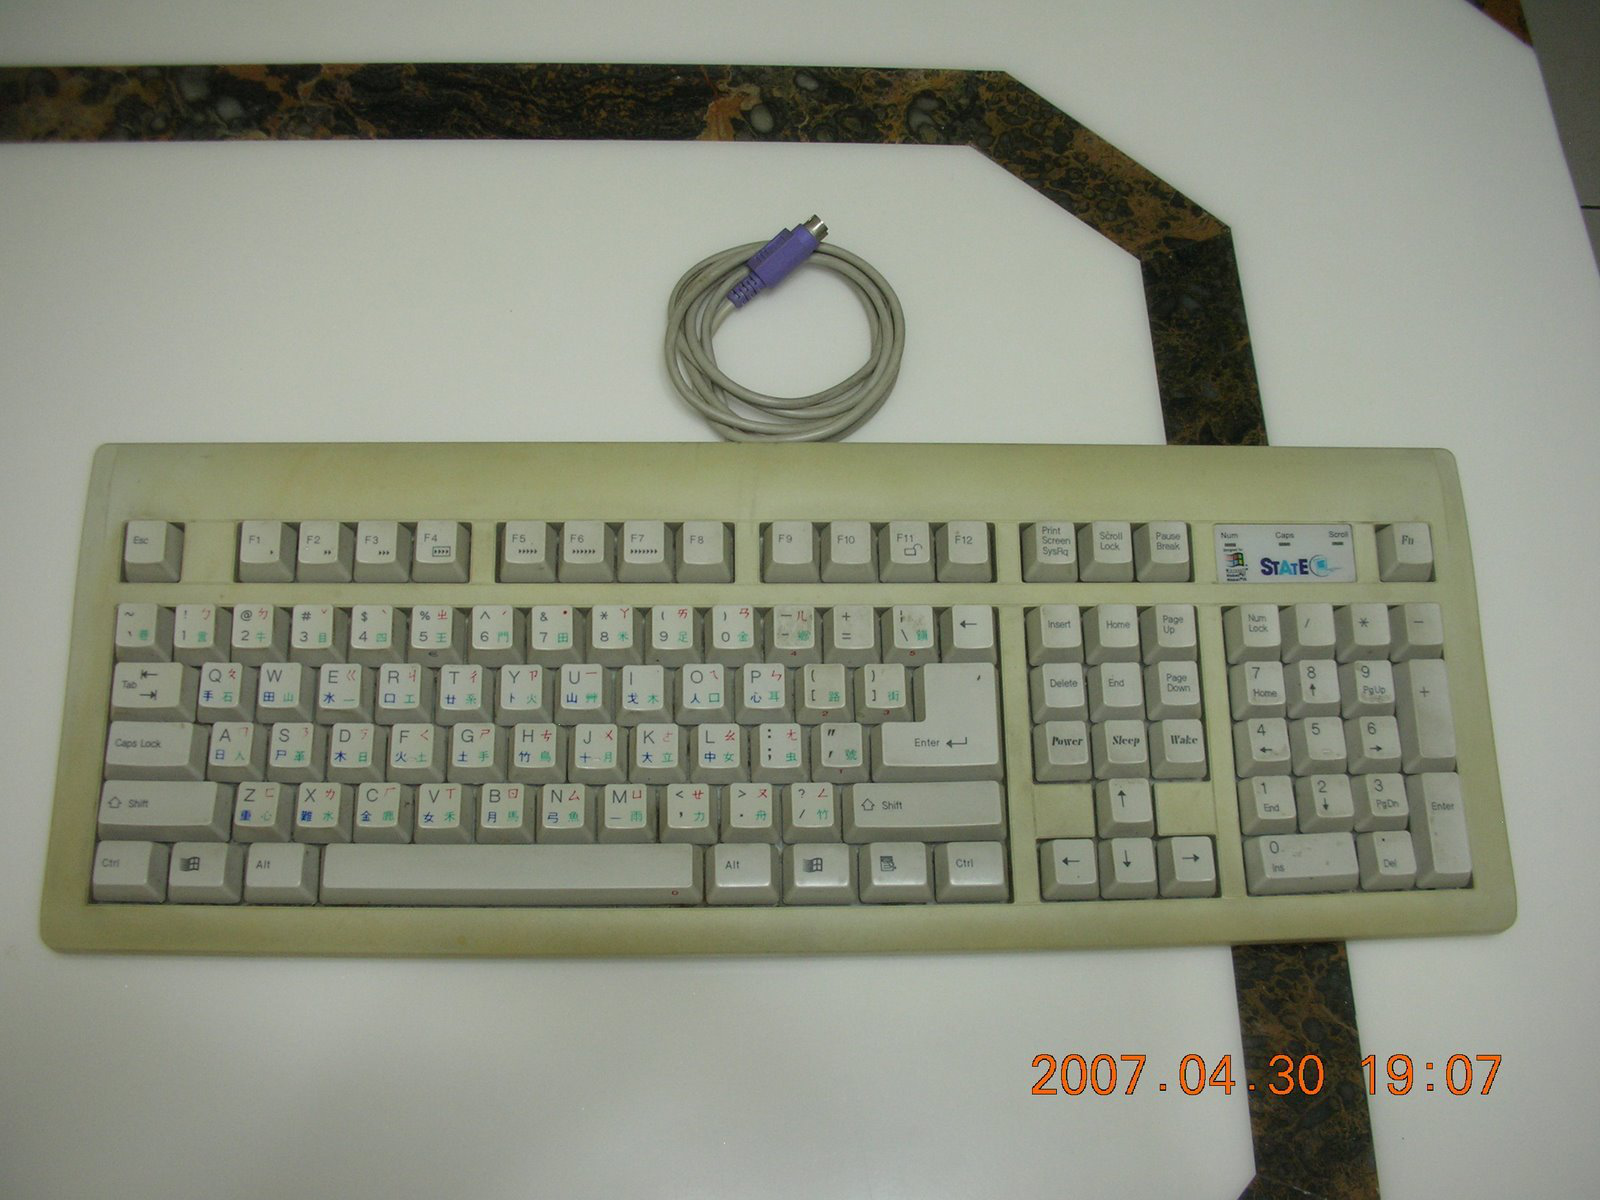

In [77]:
print(origin_image_size)
origin_image

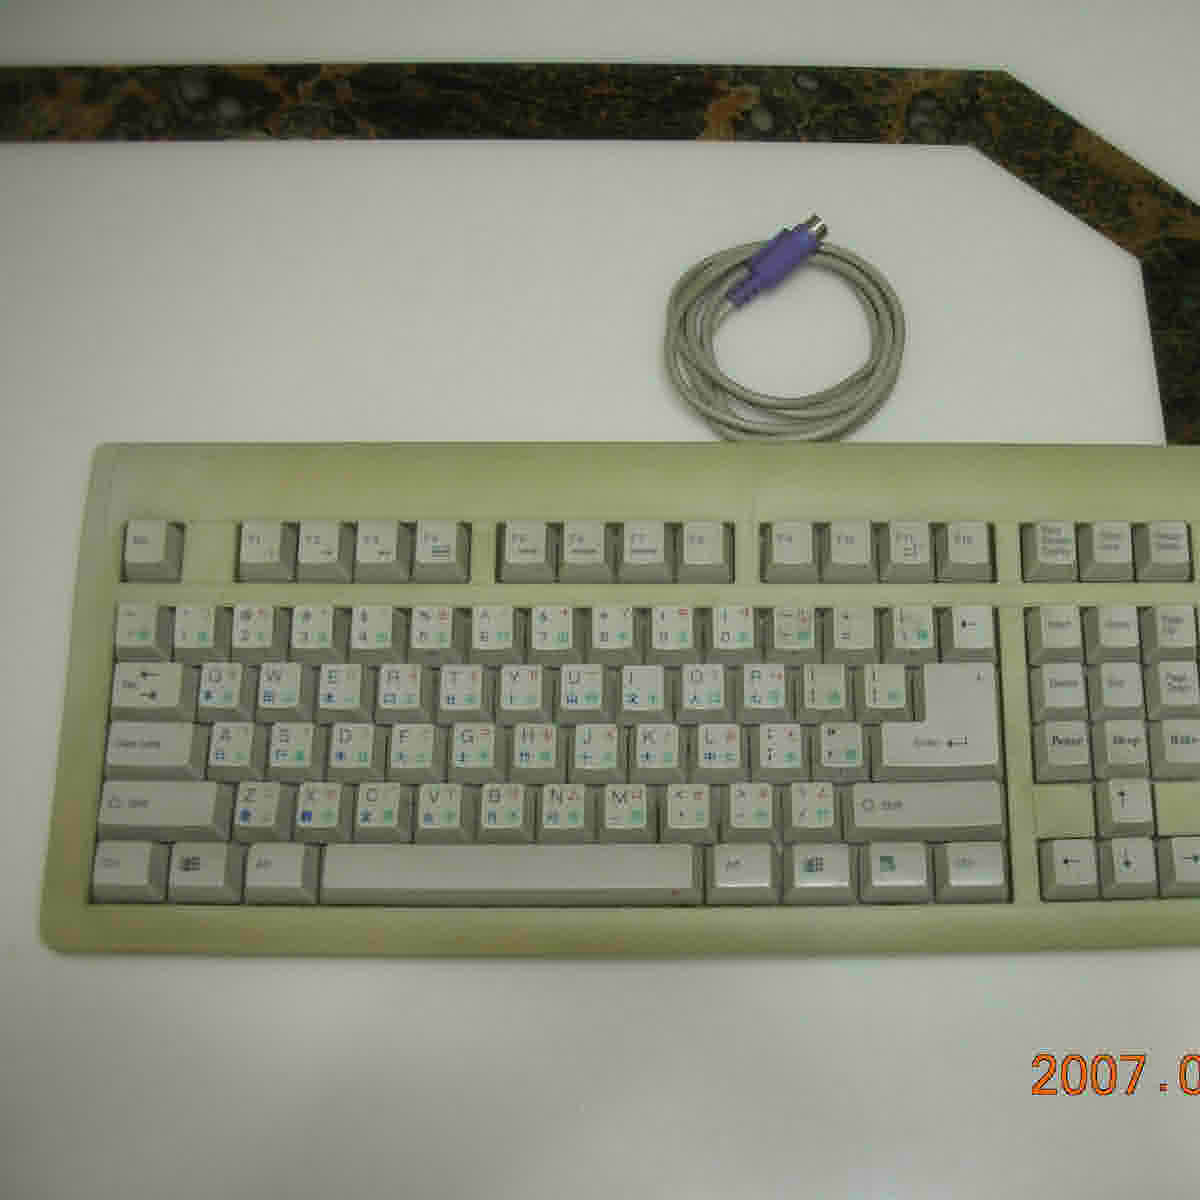

In [78]:
rec_pil_image = Image.merge("YCbCr", pil_channels).convert('RGB')
rec_pil_image

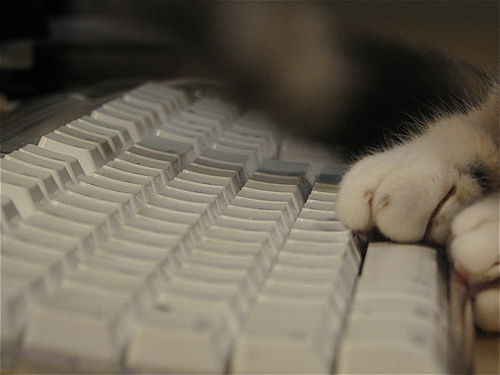

In [39]:
rec_image = Image.merge("YCbCr", channels).convert('RGB')
rec_image

In [44]:
print(origin_image_size)

122202


In [43]:
f1 = BytesIO()
rec_image.save(f1, format='JPEG', quality=100)#qtables=pil_qtables)
rec_image_size = len(f1.getvalue())
print(rec_image_size)

130720


In [46]:
rec_pil_image
f2 = BytesIO()
rec_pil_image.save(f2, format='JPEG', quality=100)#qtables=pil_qtables)
rec_pil_image_size = len(f2.getvalue())
print(rec_pil_image_size)

23354


122202


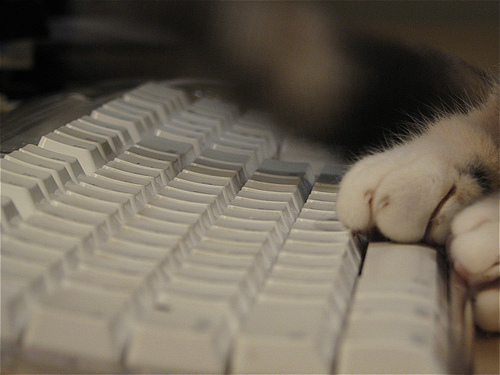

In [48]:
f3 = BytesIO()
origin_image.save(f3, format='JPEG', quality=100)
conventional_file_size = len(f3.getvalue())
f3.seek(0)
print(conventional_file_size)
origin_image_read = Image.open(f3)
origin_image_read

7883


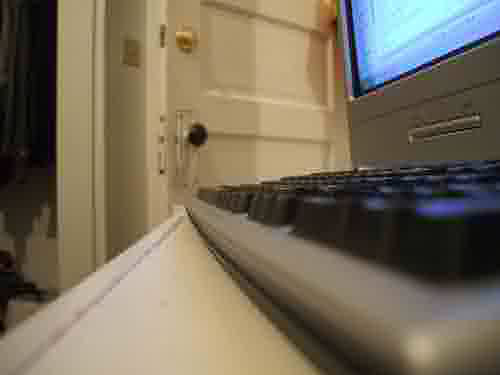

In [66]:
pil_qtables = {}
for idx, q_table in enumerate(q_tables):
    pil_qtables[idx] = zig_zag_flatten(q_table).tolist()

_origin_image = origin_image

f4 = BytesIO()
_origin_image.save(f4, format='JPEG', qtables=pil_qtables)
deepn_file_size = len(f4.getvalue())
#f4.seek(0)
print(deepn_file_size)
_origin_image_read = Image.open(f4)
_origin_image_read

Data round 0
/home/imagenet-data/train/n03085013/n03085013_4489.JPEG


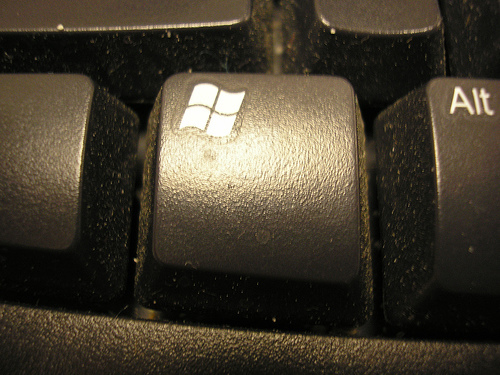

In [19]:
origin_image= next(generator)
origin_image

In [43]:
for i in generator:
    Image.show(generator)

/home/imagenet-data/train/n03085013/n03085013_25671.JPEG


AttributeError: module 'PIL.Image' has no attribute 'show'

In [41]:
generator = simple_image_generator('/home/imagenet-data/train/n03085013')
# Generate testing image
for i in range(7):
    origin_image= next(generator)
    origin_image

TypeError: 'generator' object is not callable

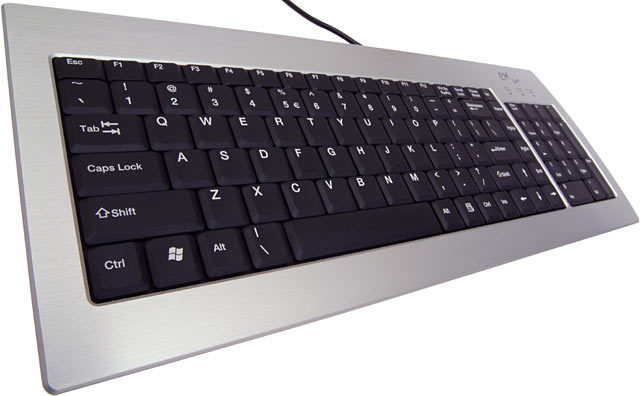

In [34]:
origin_image